# 線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$


特徴量の数nは任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$
h_\theta(x) = \theta^T \cdot x.
$$

### 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j n= \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

《雛形》

ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

### 【問題3】推定

推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。

### 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    return mse

### 【問題5】目的関数

以下の数式で表される線形回帰の**目的関数（損失関数）**を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [4]:
class ScratchLinearRegression(): 
    def __init__(self, num_iter=5000, lr=0.001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        self.coef_ = None

    # 問題1
    def _linear_hypothesis(self, X):
        hypothesis = np.matmul(X, self.coef_.T)
        return hypothesis

    # 問題2
    def fit(self, X, y, X_val=None, y_val=None):
        if self.no_bias: # no_biasの有無で分岐させる
            self.coef_ = np.random.rand(len(X[0]))
        else:
            X = np.hstack([np.ones([X.shape[0], 1]), X])
            self.coef_ = np.random.rand(len(X[0]))

        # 検証データが入力された（array属性を有する）場合とそれ以外で分岐させる
        if hasattr(X_val, "__array__") and hasattr(y_val, "__array__"):
            for i in range(self.num_iter):               
                hx = self._linear_hypothesis(X)
                self.coef_ = self._gradient_descent(X, y, hx)
                self.loss[i] = self._loss_function(hx, y)
                y_pred = self.predict(X_val) # 検証データに対する学習を追加する
                self.val_loss[i] = self._loss_function(y_pred, y_val)
        
        else:
            for j in range(self.num_iter):
                hx = self._linear_hypothesis(X)               
                self.coef_ = self._gradient_descent(X, y, hx)
                self.loss[j] = self._loss_function(hx, y)
        
        if self.verbose: #verboseをTrueにした際は学習過程を出力
            print("loss：{}".format(self.loss))
            print("val_loss：{}".format(self.val_loss))

    def _gradient_descent(self, X, y, hx):
        """
        最急降下法を実装する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        y : 次の形のndarray, shape (n_samples, 1)
        hx : 次の形のndarray, shape (n_samples, 1)
             線形の仮定関数
        Returns
        -------
        self.coef_ : 次の形のndarray, shape (n_samples, 1)
             更新後のパラメータ
        """
        self.coef_ -= self.lr * np.matmul((hx - y), X) / X.shape[0]
        return self.coef_

    # 問題3
    def predict(self, X):
        if self.no_bias: # no_biasの有無で分岐させる
            pass
        else:
            X = np.hstack([np.ones([X.shape[0], 1]), X]) 

        predict = np.matmul(X, self.coef_.T)
        return predict
    
    # 問題5
    def _loss_function(self, hx, y):
        loss = np.sum((hx - y) ** 2) / (2 * len(y))
        return loss
    
    # 問題7
    def learning_curve(self):
        plt.figure(figsize=(10, 7))
        plt.plot(np.arange(len(self.loss)) , self.loss, linewidth = 5.0, label = "train_loss")
        plt.plot(np.arange(len(self.val_loss)) , self.val_loss, linewidth = 5.0, label = "test_loss")
        plt.title("model loss")
        plt.xlabel("iter")
        plt.ylabel("loss")
        plt.legend()

### 【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [6]:
# データセットを読み込む
train_csv = pd.read_csv("../diveintocode-ml/house-prices-advanced-regression-techniques/train.csv")

# 目的変数と説明変数（2つ）を用意する
X = train_csv.loc[:, ["GrLivArea", "YearBuilt"]].values
y = train_csv["SalePrice"].values

# データと訓練用と検証用に分割する（訓練データ80%、検証データ20%）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [8]:
# 説明変数を標準化する
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# ScratchLinearRegressionクラスを読み込み、学習する
lr_scratch = ScratchLinearRegression()

lr_scratch.fit(X_train_std, y_train, X_test_std, y_test)

In [9]:
# 推定し、MSE（平均二乗誤差）を計算する
y_pred = lr_scratch.predict(X_test_std)

print("MSE：{}".format(MSE(y_pred, y_test)))

MSE：2260416093.3843694


In [10]:
# 目的関数の推移を表示する（verbose =True）
lr_scratch_ver = ScratchLinearRegression(verbose=True)

lr_scratch_ver.fit(X_train_std, y_train, X_test_std, y_test)

loss：[1.94228836e+10 1.93855545e+10 1.93483016e+10 ... 1.08349546e+09
 1.08349391e+09 1.08349237e+09]
val_loss：[1.98678658e+10 1.98296629e+10 1.97915381e+10 ... 1.13021133e+09
 1.13020970e+09 1.13020807e+09]


#### scikit-learnによる実装

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# LinearRegressionクラスを読み込み、学習する
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_std, y_train)

# 推定し、MSE（平均二乗誤差）を計算する
y_pred_lr = lr_sklearn.predict(X_test_std)

print("MSE：{}".format(mean_squared_error(y_test, y_pred_lr)))

MSE：2258879810.3460536


Text(0, 0.5, 'SalePrice [$]')

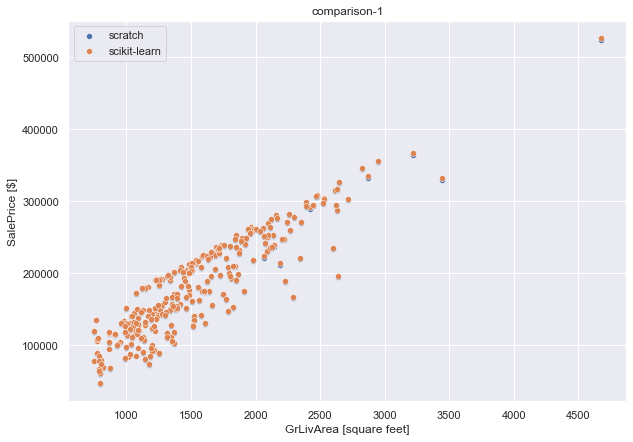

In [12]:
# 横軸「GrLivArea」、縦軸「SalePrice」の散布図を描画して可視化する
# scratchに基づく予測（青色）とscikit-learnに基づく予測（赤色）を重ねて析出

sns.set()
plt.figure(figsize=(10, 7))
sns.scatterplot(X_test[:,0], y_pred, label="scratch")
sns.scatterplot(X_test[:,0], y_pred_lr, label="scikit-learn")
plt.title("comparison-1")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")

Text(0, 0.5, 'SalePrice [$]')

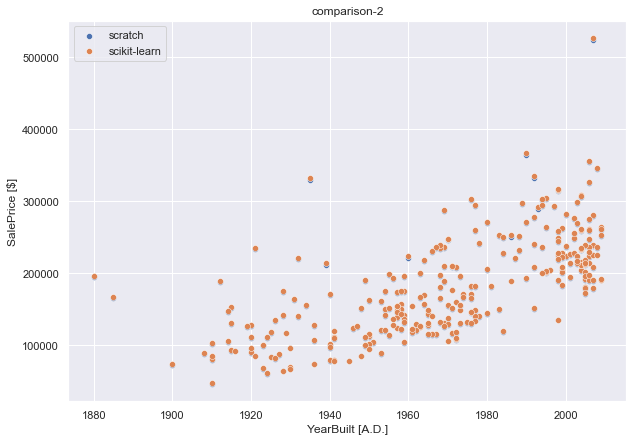

In [13]:
# 横軸「YearBuilt」、縦軸「SalePrice」の散布図を描画して可視化する
# scratchに基づく予測（青色）とscikit-learnに基づく予測（赤色）を重ねて析出

plt.figure(figsize=(10, 7))
sns.scatterplot(X_test[:,1], y_pred, label="scratch")
sns.scatterplot(X_test[:,1], y_pred_lr, label="scikit-learn")
plt.title("comparison-2")
plt.xlabel("YearBuilt [A.D.]")
plt.ylabel("SalePrice [$]")

SalePriceの推定結果の分布がおおよそ重なっているので、scalerクラッチが正しく機能していると考察できる。

### 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

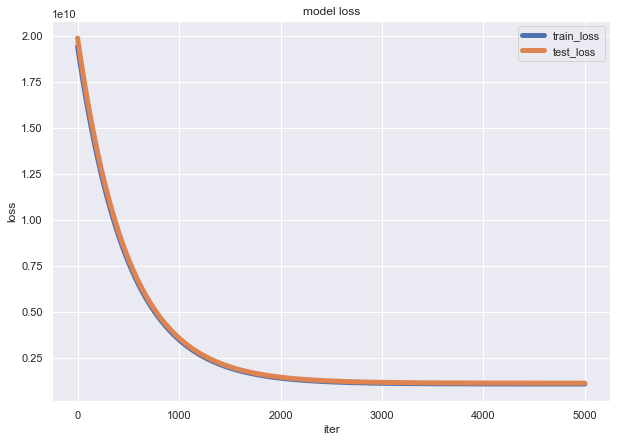

In [14]:
# 学習曲線を表示する関数（learning_curve( )）をクラス内に実装
lr_scratch.learning_curve()

### 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [15]:
# 「no_bias=True」としてバイアス項θ0を抜き、目的関数の推移を表示する
lr_scratch_bias = ScratchLinearRegression(no_bias=True, verbose=True)

lr_scratch_bias.fit(X_train_std, y_train, X_test_std, y_test)

loss：[1.94229399e+10 1.94181297e+10 1.94133307e+10 ... 1.73503954e+10
 1.73503953e+10 1.73503952e+10]
val_loss：[1.99009415e+10 1.98956836e+10 1.98904380e+10 ... 1.76629278e+10
 1.76629272e+10 1.76629265e+10]


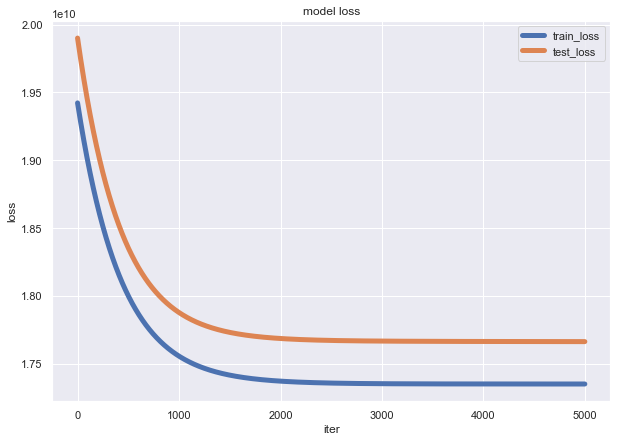

In [16]:
# 学習曲線を表示する
lr_scratch_bias.learning_curve()

**バイアス項ありの方がバイアス項なしの場合よりも、最終的な損失が小さい（精度が高い）。
また、バイアス項ありの方がバイアス項なしの場合よりも、訓練データと検証データの損失の差が小さい（汎化性能が高い）。**